# 最小二乘拟合

In [14]:
import numpy as np
from scipy import linalg
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']          # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False            # 用来正常显示负号

In [15]:
def func(x, p):
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)
    
def residuals(p, y, x):
    return y - func(x, p)

In [16]:
x = np.linspace(0, -2*np.pi, 100)
A, k, theta = 10, 0.34, np.pi/6                     # 真实数据的函数参数
y0 = func(x, [A, k, theta])                           # 真实数据
y1 = y0 + 2 * np.random.randn(len(x))                 # 加入噪声之后的实验数据
p0 = [7, 0.2, 0]                                      # 第一次猜测的函数拟合参数

In [17]:
plsq = leastsq(residuals, p0, args=(y1, x))
print("真实参数:", [A, k, theta])
print("拟合参数:", plsq[0])

真实参数: [10, 0.34, 0.5235987755982988]
拟合参数: [-9.47623309  0.34062671  3.6904794 ]


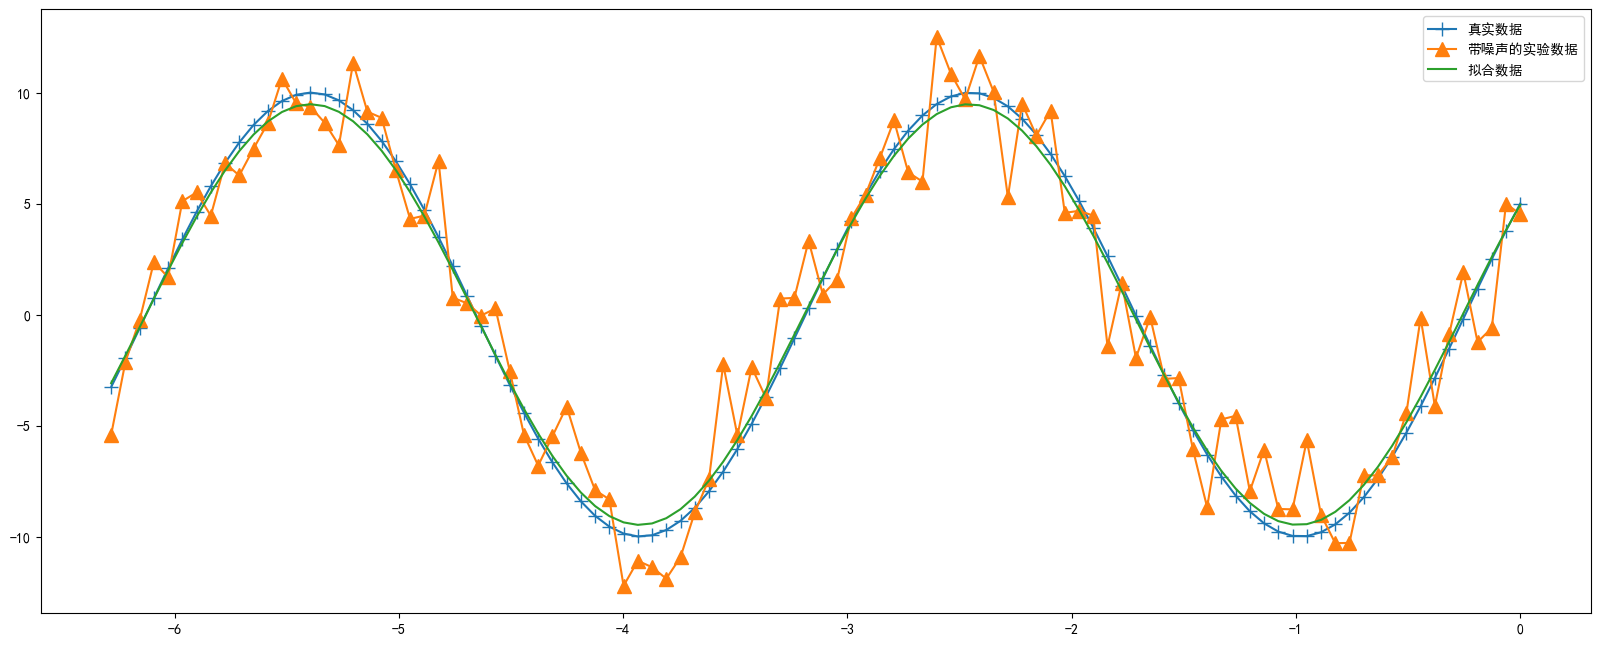

In [18]:
plt.figure(figsize=(20, 8), dpi=100)
plt.plot(x, y0, marker='+', label=u"真实数据", markersize=10)
plt.plot(x, y1, marker='^', label=u"带噪声的实验数据", markersize=10)
plt.plot(x, func(x, plsq[0]), label=u"拟合数据")
plt.legend()
plt.show()

## 多元函数的拟合

In [19]:
import numpy as np
from scipy import optimize		# 最小二乘法拟合
import matplotlib.pyplot as plt 	# python matplotlib 绘图
from mpl_toolkits.mplot3d import Axes3D  # 3D 绘图

In [20]:
def func(x, y, p1, p2):
	""" 数据拟合所用的函数 z=ax+by
	:param x: 自变量 x
	:param y: 自变量 y
	:param p: 拟合参数 a, b
	"""
	a, b = p
	return a*x + b*y

def residuals(p, z, x, y):
	""" 得到数据 z 和拟合函数之间的差
	"""
	return z - func(x, y, p)

In [21]:
x = np.arange(5)
y = np.arange(5)
z = np.array([2, 4, 7, 7, 10])  

plsq = optimize.leastsq(residuals, np.array([0, 0]), args=(z, x, y)) 
a, b = plsq[0]  
print("拟合结果:\na = {}".format(a))
print("b = {}".format(b))

TypeError: func() missing 1 required positional argument: 'p2'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17932\2110860500.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)    # 3D 绘图


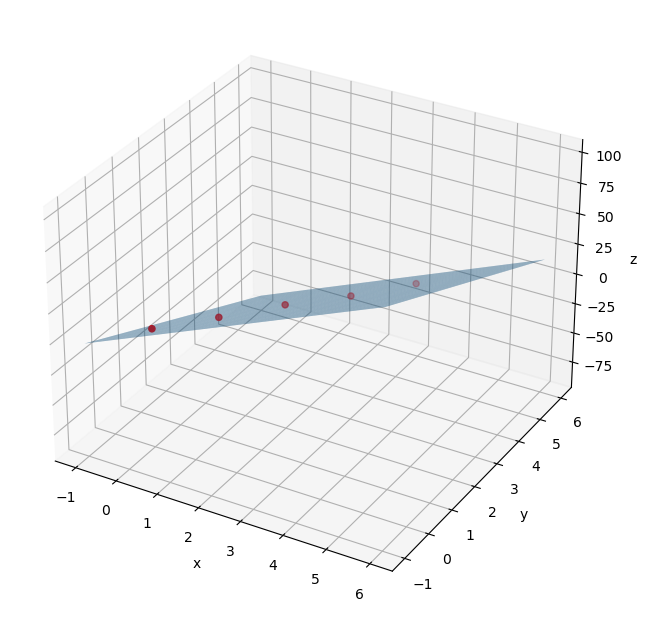

In [ ]:
xp = np.linspace(-1, 6, 100)
yp = np.linspace(-1, 6, 100)

X, Y = np.meshgrid(xp, yp)
Z = func(X, Y, [a, b])   

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = Axes3D(fig)    # 3D 绘图

ax.plot_surface(X, Y, Z, alpha=0.5)
ax.scatter(x, y, z, color="r")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()